# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to  our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
#cities

598


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create empty lists for the columns in our dataframe
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_Temp=[]
Wind_Speed=[]

#base url to get weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


print("Beginning of Data Retrieval")
print("-----------------------------------")


#To print cities in the sets of 50
batch_size = 50

#intializing num 
num = 1

#Looping over all the cities in steps of 50
for i in range(0, len(cities)+1, batch_size):
    
    #storing in sets of 50 cities for all our cities 
    cities_list = cities[i:i+batch_size]
    
    
    #print(cities_list)
    
    
    #looping over 50 cities
    for index, city in enumerate(cities_list):
    

        
        try:
            
            #getting the json response from our query url for every city
            response = requests.get(query_url + city).json()
            #print(response)
        
            print(f"Processed Record {index} of set {num} of |{city}")
            
            #appending extracted response to respective lists
            Cloudiness.append(response['clouds']['all'])
            Country.append(response['sys']['country'])
            Date.append(response['dt'])
            Humidity.append(response['main']['humidity'])
            Lat.append(response['coord']['lat'])
            Lng.append(response['coord']['lon'])
            Max_Temp.append(response['main']['temp_max'])
            Wind_Speed.append(response['wind']['speed'])

        except:
            
            print("City not found.Skipping....")
            
            #appending None to the lists if city is not found
            Cloudiness.append(None)
            Country.append(None)
            Date.append(None)
            Humidity.append(None)
            Lat.append(None)
            Lng.append(None)
            Max_Temp.append(None)
            Wind_Speed.append(None)
            
    #incrementing num by 1 for every sets of 50
    num += 1
   
    


Beginning of Data Retrieval
-----------------------------------
Processed Record 0 of set 1 of |bosaso
Processed Record 1 of set 1 of |vaitupu
City not found.Skipping....
Processed Record 2 of set 1 of |riohacha
Processed Record 3 of set 1 of |taolanaro
City not found.Skipping....
Processed Record 4 of set 1 of |namatanai
Processed Record 5 of set 1 of |kavieng
Processed Record 6 of set 1 of |victoria
Processed Record 7 of set 1 of |tasiilaq
Processed Record 8 of set 1 of |lata
Processed Record 9 of set 1 of |mataura
Processed Record 10 of set 1 of |miyako
Processed Record 11 of set 1 of |laguna
Processed Record 12 of set 1 of |hilo
Processed Record 13 of set 1 of |sao filipe
Processed Record 14 of set 1 of |rikitea
Processed Record 15 of set 1 of |puerto ayora
Processed Record 16 of set 1 of |barentsburg
City not found.Skipping....
Processed Record 17 of set 1 of |ushuaia
Processed Record 18 of set 1 of |ambilobe
Processed Record 19 of set 1 of |kruisfontein
Processed Record 20 of set

Processed Record 35 of set 4 of |kodiak
Processed Record 36 of set 4 of |grindavik
Processed Record 37 of set 4 of |saskylakh
Processed Record 38 of set 4 of |sur
Processed Record 39 of set 4 of |lebu
Processed Record 40 of set 4 of |san patricio
Processed Record 41 of set 4 of |raudeberg
Processed Record 42 of set 4 of |batemans bay
Processed Record 43 of set 4 of |provideniya
Processed Record 44 of set 4 of |catalina
Processed Record 45 of set 4 of |yaan
Processed Record 46 of set 4 of |quelimane
Processed Record 47 of set 4 of |urengoy
Processed Record 48 of set 4 of |buraydah
Processed Record 49 of set 4 of |kyshtovka
Processed Record 0 of set 5 of |lompoc
Processed Record 1 of set 5 of |pacific grove
Processed Record 2 of set 5 of |khovu-aksy
Processed Record 3 of set 5 of |cabo rojo
Processed Record 4 of set 5 of |qafsah
City not found.Skipping....
Processed Record 5 of set 5 of |chuy
Processed Record 6 of set 5 of |dikson
Processed Record 7 of set 5 of |alibag
Processed Record 8

Processed Record 17 of set 8 of |makakilo city
Processed Record 18 of set 8 of |rio gallegos
Processed Record 19 of set 8 of |bridgton
Processed Record 20 of set 8 of |falam
Processed Record 21 of set 8 of |denizli
Processed Record 22 of set 8 of |hope
Processed Record 23 of set 8 of |kalamata
Processed Record 24 of set 8 of |port hardy
Processed Record 25 of set 8 of |charters towers
Processed Record 26 of set 8 of |shimoda
Processed Record 27 of set 8 of |mikumi
Processed Record 28 of set 8 of |jijiga
Processed Record 29 of set 8 of |luancheng
Processed Record 30 of set 8 of |surt
Processed Record 31 of set 8 of |muriti
Processed Record 32 of set 8 of |maniitsoq
Processed Record 33 of set 8 of |iqaluit
Processed Record 34 of set 8 of |puerto rico
Processed Record 35 of set 8 of |klaksvik
Processed Record 36 of set 8 of |port hawkesbury
Processed Record 37 of set 8 of |matagami
Processed Record 38 of set 8 of |penzance
Processed Record 39 of set 8 of |puerto leguizamo
Processed Record

Processed Record 5 of set 12 of |lang suan
Processed Record 6 of set 12 of |wajir
Processed Record 7 of set 12 of |petropavlovsk-kamchatskiy
Processed Record 8 of set 12 of |malwan
City not found.Skipping....
Processed Record 9 of set 12 of |aasiaat
Processed Record 10 of set 12 of |opuwo
Processed Record 11 of set 12 of |allanridge
Processed Record 12 of set 12 of |roma
Processed Record 13 of set 12 of |gisborne
Processed Record 14 of set 12 of |sabha
Processed Record 15 of set 12 of |havoysund
Processed Record 16 of set 12 of |ahuimanu
Processed Record 17 of set 12 of |port-de-paix
City not found.Skipping....
Processed Record 18 of set 12 of |thabazimbi
Processed Record 19 of set 12 of |bouar
Processed Record 20 of set 12 of |fare
Processed Record 21 of set 12 of |haibowan
City not found.Skipping....
Processed Record 22 of set 12 of |nador
Processed Record 23 of set 12 of |carutapera
Processed Record 24 of set 12 of |nago
Processed Record 25 of set 12 of |verkhnevilyuysk
Processed Re

In [6]:
#making a dataframe with our cities
cities_df1 = pd.DataFrame(cities)

#renaming the column from '0' to 'city'
cities_df1 = cities_df1.rename(columns = {0:'City'})

#creating columns with just empty string
cities_df1['Cloudiness'] = ""
cities_df1['Country'] = ""
cities_df1['Date'] = ""
cities_df1['Humidity'] = ""
cities_df1['Lat'] = ""
cities_df1['Lng']= ""
cities_df1['Max_Temp'] = ""
cities_df1['Wind_Speed'] = ""

#Assigning values to our columns from the lists we appended from our extracted response
cities_df1['Cloudiness']= Cloudiness
cities_df1['Country'] = Country
cities_df1['Date'] = Date
cities_df1['Humidity'] = Humidity
cities_df1['Lat'] = Lat
cities_df1['Lng'] = Lng
cities_df1['Max_Temp'] = Max_Temp
cities_df1['Wind_Speed'] =  Wind_Speed
cities_df1.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,bosaso,0.0,SO,1.583268e+09,77.0,11.28,49.18,76.87,9.48
1,vaitupu,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
2,riohacha,81.0,CO,1.583268e+09,62.0,11.54,-72.91,86.00,12.75
3,taolanaro,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
4,namatanai,100.0,PG,1.583268e+09,72.0,-3.67,152.43,84.83,4.81


In [7]:
#dropping the NaN values from the dataframe
cities_df1= cities_df1.dropna(how = 'any', axis = 0)

#counting to see if all the columns have same amount of data or not
cities_df1.count()


City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max_Temp      551
Wind_Speed    551
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#wrtting the cities result to our csv file
cities_df1.to_csv("../OutPut/cities_result.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
#taking one value from date column and converting it to proper date format using our 'time' module
date_time =cities_df1['Date'][0]

date_year = time.strftime('%m/%d/%Y', time.gmtime(date_time))
date_year

'03/03/2020'

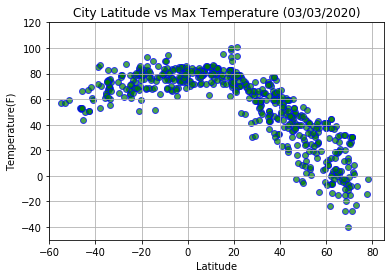

In [16]:
#saving Max Temp in Temperature variable
Temperature= cities_df1['Max_Temp']

#saving Lat in Latitude variable
Latitude = cities_df1['Lat']

#plotting scatter plot using Latitude and Temperature
plt.scatter(Latitude,Temperature,marker='o',edgecolors='b',c='g',alpha = 0.7,linewidths= 1)

#defining the xlim and ylim
plt.xlim(-60,85)
plt.ylim(-50,120)

#assigning the labels and title
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title(f"City Latitude vs Max Temperature ({date_year})")

#for making grids
plt.grid()

#saving the figure
plt.savefig("../OutPut/Fig1_Lat_Temp.png")

The above plot shows relationship between Latitude and Temperature(F). For the Latitudes below 0, Temperature seem to be above 40(F). As the Latitude progresses above 0 , Temperature keeps dropping below 0(F).

#### Latitude vs. Humidity Plot

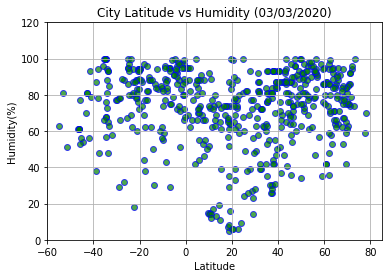

In [17]:
#saving Humidity from the dataframe to a variable Humidity1
Humidity1 = cities_df1['Humidity']

#scatter plot for latitude and humidity
plt.scatter(Latitude,Humidity1,marker='o',edgecolors='b',c='g',alpha = 0.7,linewidths= 1)

#defining limits
plt.xlim(-60,85)
plt.ylim(0,120)

#assigning labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs Humidity ({date_year})")

#for making grids
plt.grid()
#saving the figure
plt.savefig("../OutPut/Fig2_Lat_Humidity.png")

The above plot shows relationship between Latitude and Humidity. For Latitudes over 0, Humidity varies from 40% to 100%,most purticularly, at Latitude of 20, Humidity varies from around 5% to 100%. For Latitude below 0, its not that humid. Humidity varies from 40% to 100% but not so many clusters are seen ,like for the ones shown for Latitude over 0. 

#### Latitude vs. Cloudiness Plot

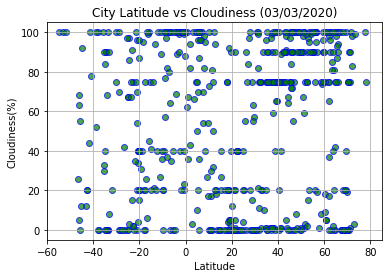

In [18]:
#saving the data from Cloudiness column in our dataframe to a variable Cloudiness1
Cloudiness1 = cities_df1['Cloudiness']

#scatter plot for Latitude and Cloudiness
plt.scatter(Latitude,Cloudiness1,marker='o',edgecolors='b',c='g',alpha = 0.7,linewidths= 1)

#setting the limits
plt.xlim(-60,85)
plt.ylim(-5,105)

#assigning the labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs Cloudiness ({date_year})")

#for making grid
plt.grid()
#saving our figure
plt.savefig("../OutPut/Fig3_Lat_Cloudiness.png")

The above plot shows relationship for Latitude and Cloudiness. For Latitudes below 0 or over 0, cloudiness is between 0 and 100%. Little more cloudiness for Latitudes over 0.

#### Latitude vs. Wind Speed Plot

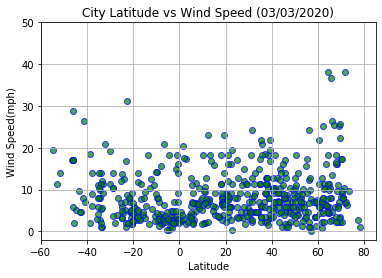

In [19]:
#Strpping white space from my column name
cities_df1.columns = cities_df1.columns.str.strip()

#saving the data from Wind speed column to a variable wind_speed1
wind_speed1 = cities_df1['Wind_Speed']

#scatter plot for Latitude and Wind Speed
plt.scatter(Latitude,wind_speed1,marker='o',edgecolors='b',c='g',alpha = 0.7,linewidths= 1)

#setting limits
plt.xlim(-60,85)
plt.ylim(-2,50)

#assiging labels and titl
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs Wind Speed ({date_year})")

#making grid
plt.grid()

#saving the figure
plt.savefig("../OutPut/Fig4_Lat_WindSpeed.png")


This plot shows relationship between windspeed and latitude. Windspeed is between 0 to 30 miles per hour through out the latitude. At latitude of 60 - 80, wind speed goes around 40 miles per hour at few places.

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [21]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = cities_df1[cities_df1['Lat'] >= 0]
south_hem = cities_df1[cities_df1['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.7614335117331944


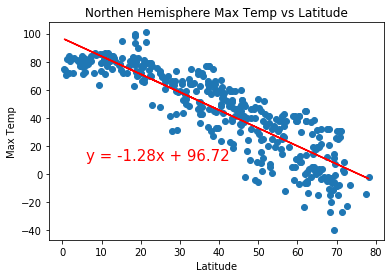

In [22]:
# This snippet of code calculates linear regression between latitude and temperature for northen hemisphere.

north_hem_temp = north_hem['Max_Temp']
north_hem_lat = north_hem['Lat']

#return values of linregress function on northern hemisphere temperature and northern hemisphere latitude
slope_north, intercept_north,rvalue_north, pvalue_north,stderr_north = linregress(north_hem_lat,north_hem_temp)

#regression line for northen hem lat and northen hem temp
north_fit = north_hem_lat * slope_north + intercept_north

#forming the line equation to annotate
line_eq = "y = " + str(round(slope_north,2)) + "x + " + str(round(intercept_north,2))

#scatter plot 
plt.scatter(north_hem_lat,north_hem_temp)

#line plot for the regression line
plt.plot(north_hem_lat,north_fit,"r-")

#annotating the line equation on the plot
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#assigning the labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northen Hemisphere Max Temp vs Latitude")

#saving the figure
plt.savefig("../OutPut/Fig5_north_hem_lat_temp.png")

#finding the r-squared value
print(f"The r-squared is : {rvalue_north**2}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-squared is : 0.32272704709790623


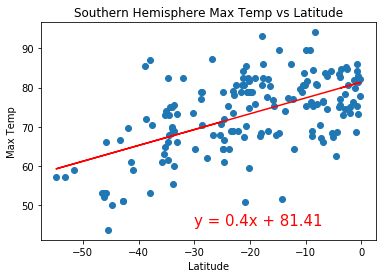

In [23]:
# This snippet of code calculates linear regression between latitude and temperature for southern hemisphere.

south_hem_temp = south_hem['Max_Temp']
south_hem_lat = south_hem['Lat']

#return values of linregress function on southern hemisphere temperature and southern hemisphere latitude
slope_south, intercept_south,rvalue_south, pvalue_south,stderr_south = linregress(south_hem_lat,south_hem_temp)

#regression line for southern hem lat and southern hem temp
south_fit = south_hem_lat * slope_south + intercept_south

#forming the line equation to annotate
line_eq = "y = " + str(round(slope_south,2)) + "x + " + str(round(intercept_south,2))

#scatter plot 
plt.scatter(south_hem_lat,south_hem_temp)

#line plot for the regression line
plt.plot(south_hem_lat,south_fit,"r-")

#annotating the line equation on the plot
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")

#assigning the labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere Max Temp vs Latitude")

#saving the figure
plt.savefig("../OutPut/Fig6_south_hem_lat_temp.png")

#finding the r-squared value
print(f"The r-squared is : {rvalue_south**2}")


This above 2 plots show the linear regression relation between latitude and temperature for northen hemisphere  and southern hemisphere. For the northen hemisphere the r-squared value is 0.76 and for the southen hemisphere the r-squared value is 0.32. From this r-squared values, we can say that data for northen hemisphere are more close to the fitted regression line than for the southern one.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.08860343703553462


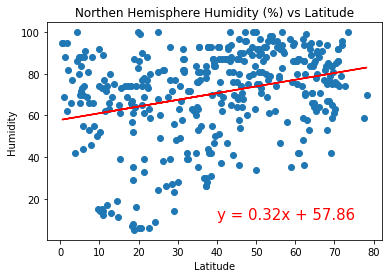

In [24]:
# This snippet of code calculates linear regression between latitude and humidity for northen hemisphere.
north_hem_humidity = north_hem['Humidity']

#return values of linregress function on northern hemisphere humidity and northern hemisphere latitude
slope_north1, intercept_north1,rvalue_north1, pvalue_north1,stderr_north1 = linregress(north_hem_lat,north_hem_humidity)

#regression line for northen hem lat and northen hem humidity
north_fit1 = north_hem_lat * slope_north1 + intercept_north1

#forming the line equation to annotate
line_eq = "y = " + str(round(slope_north1,2)) + "x + " + str(round(intercept_north1,2))

#scatter plot 
plt.scatter(north_hem_lat,north_hem_humidity)

#line plot for the regression line
plt.plot(north_hem_lat,north_fit1,"r-")

#annotating the line equation on the plot
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

#assigning the labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northen Hemisphere Humidity (%) vs Latitude")

#saving the figure
plt.savefig("../OutPut/Fig7_north_hem_lat_humidity.png")

#finding the r-squared value
print(f"The r-squared is : {rvalue_north1**2}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.05220507288162441


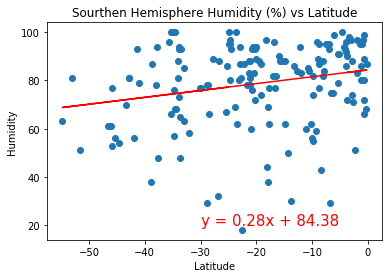

In [25]:
# This snippet of code calculates linear regression between latitude and humidity for southern hemisphere
south_hem_humidity = south_hem['Humidity']


#return values of linregress function on southern hemisphere humidity and southern hemisphere latitude
slope_south1, intercept_south1,rvalue_south1, pvalue_south1,stderr_south1 = linregress(south_hem_lat,south_hem_humidity)


#regression line for southern hem lat and southern hem humidity
south_fit1 = south_hem_lat * slope_south1 + intercept_south1

#forming the line equation to annotate
line_eq = "y = " + str(round(slope_south1,2)) + "x + " + str(round(intercept_south1,2))

#scatter plot 
plt.scatter(south_hem_lat,south_hem_humidity)

#line plot for the regression line
plt.plot(south_hem_lat,south_fit1,"r-")

#annotating the line equation on the plot
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")

#assigning the labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Sourthen Hemisphere Humidity (%) vs Latitude")

#saving the figure
plt.savefig("../OutPut/Fig8_south_hem_lat_humidity.png")

#finding the r-squared value
print(f"The r-squared is : {rvalue_south1**2}")


This above 2 plots show the linear regression relation between latitude and humidity for northen hemisphere  and southern hemisphere. For the northen hemisphere the r-squared value is 0.089 and for the southen hemisphere the r-squared value is 0.052. From this r-squared values, we can say that data for northen hemisphere are more close to the fitted regression line than for the southern one. Both these regression lines do not show a very good fit for the respective datas.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.024867189105109128


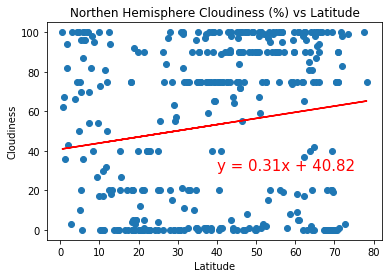

In [26]:
# This snippet of code calculates linear regression between latitude and cloudiness for northen hemisphere.
north_hem_cloud = north_hem['Cloudiness']

#return values of linregress function on northern hemisphere cloudiness and northern hemisphere latitude
slope_north2, intercept_north2,rvalue_north2, pvalue_north2,stderr_north2 = linregress(north_hem_lat,north_hem_cloud)

#regression line for northen hem lat and northen hem cloudiness
north_fit2 = north_hem_lat * slope_north2 + intercept_north2

#forming the line equation to annotate
line_eq = "y = " + str(round(slope_north2,2)) + "x + " + str(round(intercept_north2,2))

#scatter plot
plt.scatter(north_hem_lat,north_hem_cloud)

#line plot for the regression line
plt.plot(north_hem_lat,north_fit2,"r-")

#annotating the line equation on the plot
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

#assigning the labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northen Hemisphere Cloudiness (%) vs Latitude")

#saving the figure
plt.savefig("../OutPut/Fig9_north_hem_lat_cloud.png")

#finding the r-squared value
print(f"The r-squared is : {rvalue_north2**2}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.06275435758450991


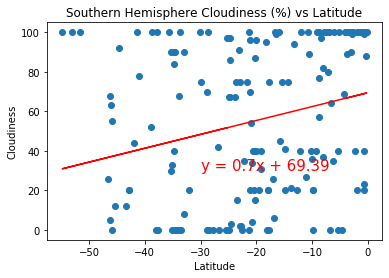

In [27]:
# This snippet of code calculates linear regression between latitude and cloudiness for southern hemisphere.
south_hem_cloud = south_hem['Cloudiness']

#return values of linregress function on southern hemisphere cloudiness and southern hemisphere latitude
slope_south2, intercept_south2,rvalue_south2, pvalue_south2,stderr_south2 = linregress(south_hem_lat,south_hem_cloud)

#regression line for southern hem lat and southern hem cloudiness
south_fit2 = south_hem_lat * slope_south2 + intercept_south2

#forming the line equation to annotate
line_eq = "y = " + str(round(slope_south2,2)) + "x + " + str(round(intercept_south2,2))

#scatter plot
plt.scatter(south_hem_lat,south_hem_cloud)

#line plot for the regression line
plt.plot(south_hem_lat,south_fit2,"r-")

#annotating the line equation on the plot
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

#assigning the labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Cloudiness (%) vs Latitude")

#saving the figure
plt.savefig("../OutPut/Fig10_south_hem_lat_cloud.png")

#finding the r-squared value
print(f"The r-squared is : {rvalue_south2**2}")

This above 2 plots show the linear regression relation between latitude and cloudiness for northen hemisphere  and southern hemisphere. For the northen hemisphere the r-squared value is 0.024 and for the southen hemisphere the r-squared value is 0.062. From this r-squared values, we can say that data for southern hemisphere are more close to the fitted regression line than for the northern one. Both these regression lines do not show a very good fit for the respective datas.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.012314637926764075


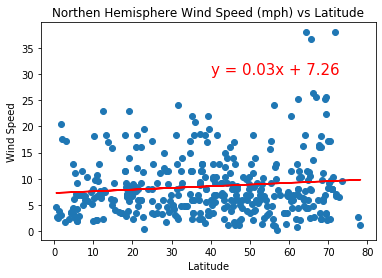

In [30]:
# This snippet of code calculates linear regression between latitude and wind speed for northen hemisphere.
north_hem_wind = north_hem['Wind_Speed']

#return values of linregress function on northern hemisphere wind speed and northern hemisphere latitude
slope_north3, intercept_north3,rvalue_north3, pvalue_north3,stderr_north3 = linregress(north_hem_lat,north_hem_wind)

#regression line for northen hem lat and northen hem wind speed
north_fit3 = north_hem_lat * slope_north3 + intercept_north3

#forming the line equation to annotate
line_eq = "y = " + str(round(slope_north3,2)) + "x + " + str(round(intercept_north3,2))

#scatter plot
plt.scatter(north_hem_lat,north_hem_wind)

#line plot for the regression line
plt.plot(north_hem_lat,north_fit3,"r-")

#annotating the line equation on the plot
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

#assigning the labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northen Hemisphere Wind Speed (mph) vs Latitude")

#saving the figure
plt.savefig("../OutPut/Fig11_north_hem_lat_wind.png")

#finding the r-squared value
print(f"The r-squared is : {rvalue_north3**2}")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.10772605206578305


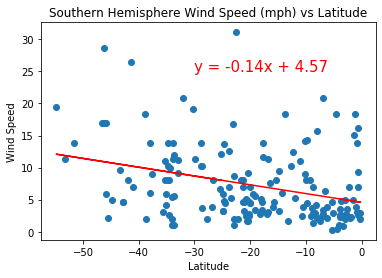

In [34]:
# This snippet of code calculates linear regression between latitude and wind speed for southern hemisphere.
south_hem_wind = south_hem['Wind_Speed']

#return values of linregress function on southern hemisphere wind speed and southern hemisphere latitude
slope_south3, intercept_south3,rvalue_south3, pvalue_south3,stderr_south3 = linregress(south_hem_lat,south_hem_wind)

#regression line for southern hem lat and southern hem wind speed
south_fit3 = south_hem_lat * slope_south3 + intercept_south3

#forming the line equation to annotate
line_eq = "y = " + str(round(slope_south3,2)) + "x + " + str(round(intercept_south3,2))

#scatter plot
plt.scatter(south_hem_lat,south_hem_wind)

#line plot for the regression line
plt.plot(south_hem_lat,south_fit3,"r-")

#annotating the line equation on the plot
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")

#assigning the labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere Wind Speed (mph) vs Latitude")

#saving the figure
plt.savefig("../OutPut/Fig12_south_hem_lat_wind.png")

#finding the r-squared value
print(f"The r-squared is : {rvalue_south3**2}")


This above 2 plots show the linear regression relation between latitude and wind speed for northen hemisphere  and southern hemisphere. For the northen hemisphere the r-squared value is 0.012 and for the southen hemisphere the r-squared value is 0.107. From this r-squared values, we can say that data for southern hemisphere are more close to the fitted regression line than for the northern one. Both these regression lines do not show a very good fit for the respective datas.